In [1]:

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from matplotlib.gridspec import GridSpec


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
dfchallenger = pd.read_pickle('complete_details_matches_challenger.pkl')
dfchallenger

,metadata.dataVersion,metadata.matchId,metadata.participants,info.gameCreation,info.gameDuration,info.gameEndTimestamp,info.gameId,info.gameMode,info.gameName,info.gameStartTimestamp,info.gameType,info.gameVersion,info.mapId,info.participants,info.platformId,info.queueId,info.teams,info.tournamentCode
0,2,BR1_2536758733,[cY2fFPtwsacwcXMI4Cz-z-9cx5_g3YJX0tAzF7lY2iZOv...,1655153083000,1886,1655155065690,2536758733,CLASSIC,teambuilder-match-2536758733,1655153178821,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 14, 'baronKills': 0, 'bountyLevel...",BR1,420,"[{'bans': [{'championId': 111, 'pickTurn': 1},...",
0,2,BR1_2536745585,[btHo40tyxTgoEiE97rMBX_EU_M3Zmg4wdzV6uF4jcQ54J...,1655150137000,1862,1655152077191,2536745585,CLASSIC,teambuilder-match-2536745585,1655150215075,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 9, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 114, 'pickTurn': 1},...",
0,2,BR1_2536770401,[CgolHMC5IH3W9Kz54jUdcRXn8m5dfTJDsr04xXWsI7mam...,1655145530000,1447,1655147011488,2536770401,CLASSIC,teambuilder-match-2536770401,1655145564342,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 12, 'baronKills': 0, 'bountyLevel...",BR1,420,"[{'bans': [{'championId': 89, 'pickTurn': 1}, ...",
0,2,BR1_2536688556,[rQlCvyuNEqEfTKo4MqoLD-uW3btqBVeEAv1X79flso8oy...,1655143602000,1432,1655145070548,2536688556,CLASSIC,teambuilder-match-2536688556,1655143638371,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 5, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 163, 'pickTurn': 1},...",
0,2,BR1_2536735256,[JgroNCoSB8UyvJl0uBBC7pU3LxJZQ5IZdNdSECfBVPWO1...,1655141175000,1387,1655142689973,2536735256,CLASSIC,teambuilder-match-2536735256,1655141302521,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 5, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 117, 'pickTurn': 1},...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2,BR1_2528454067,[Ex2JP9lhjQTc5Wi3s5yYLw6FrkIekN00tn9XGaVb-8rjz...,1654029400000,1589,1654031013840,2528454067,CLASSIC,teambuilder-match-2528454067,1654029424266,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 6, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 115, 'pickTurn': 1},...",
0,2,BR1_2528430847,[GdkXyAPxgnjHBW1ao-5j8P_oL7eEepPLLYRBN_kjEX2zS...,1654026575000,1740,1654028339465,2528430847,CLASSIC,teambuilder-match-2528430847,1654026598752,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 10, 'baronKills': 0, 'bountyLevel...",BR1,420,"[{'bans': [{'championId': 64, 'pickTurn': 1}, ...",
0,2,BR1_2528417910,[bBJXUQvpb4rB2jfLY5vqfmorJvJO1haGOP3UK_RJ5CNH7...,1654024774000,1496,1654026320003,2528417910,CLASSIC,teambuilder-match-2528417910,1654024823499,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 6, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 141, 'pickTurn': 1},...",
0,2,BR1_2528405504,[aDJ6l855T5ozFmsrmHl1f0hiyX7Vnw_3bYdPDs7cb5n_p...,1654022009000,1827,1654023889306,2528405504,CLASSIC,teambuilder-match-2528405504,1654022061919,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 7, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 236, 'pickTurn': 1},...",


In [11]:
dfgrandmaster = pd.read_pickle('complete_details_matches_grandmaster.pkl')
dfgrandmaster

,metadata.dataVersion,metadata.matchId,metadata.participants,info.gameCreation,info.gameDuration,info.gameEndTimestamp,info.gameId,info.gameMode,info.gameName,info.gameStartTimestamp,info.gameType,info.gameVersion,info.mapId,info.participants,info.platformId,info.queueId,info.teams,info.tournamentCode
0,2,BR1_2529190599,[ldPL4V1fq7Q0NaL36cTTyxM4MPRY0fQ86JU5JmHwc2UF3...,1654120927000,2021,1654123072684,2529190599,CLASSIC,teambuilder-match-2529190599,1654121051389,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 6, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 37, 'pickTurn': 1}, ...",
0,2,BR1_2529137985,[e517VnjsIttj_Hxq78tXabcjeCcJBYDH6ZTMWNCJ5EdFX...,1654118939000,1221,1654120208095,2529137985,CLASSIC,teambuilder-match-2529137985,1654118986613,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 3, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 141, 'pickTurn': 1},...",
0,2,BR1_2529164732,[WtOBBGRtg8iQP8pXC8BEG6lDeg8S6D44RDFbU0zj4OG6u...,1654116228000,1815,1654118118169,2529164732,CLASSIC,teambuilder-match-2529164732,1654116302312,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 2, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 41, 'pickTurn': 1}, ...",
0,2,BR1_2529044868,[Re9VKSZZnKQMOObZTUDBFtKe8j1ISCSpjRn4BZ9J0KYhd...,1654106060000,631,1654106717894,2529044868,CLASSIC,teambuilder-match-2529044868,1654106086209,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 0, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 24, 'pickTurn': 1}, ...",
0,2,BR1_2529062909,[ldPL4V1fq7Q0NaL36cTTyxM4MPRY0fQ86JU5JmHwc2UF3...,1654103948000,1347,1654105324120,2529062909,CLASSIC,teambuilder-match-2529062909,1654103976373,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 2, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 350, 'pickTurn': 1},...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2,BR1_2534664813,[0uT5uUIgY6YDm4XilvEzQ_bXiw_zbiD_0BbzCaLYjTAor...,1654888722000,195,1654889036623,2534664813,CLASSIC,teambuilder-match-2534664813,1654888841216,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 0, 'baronKills': 0, 'bountyLevel'...",BR1,440,"[{'bans': [{'championId': 64, 'pickTurn': 1}, ...",
0,2,BR1_2534660669,[Qalx02gYN1TFkEgCDrd-kXdNJCwi6U8r3CpX0Vwa7FwqD...,1654885166000,2108,1654887407277,2534660669,CLASSIC,teambuilder-match-2534660669,1654885298258,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 5, 'baronKills': 0, 'bountyLevel'...",BR1,440,"[{'bans': [{'championId': 235, 'pickTurn': 1},...",
0,2,BR1_2534578336,[Qalx02gYN1TFkEgCDrd-kXdNJCwi6U8r3CpX0Vwa7FwqD...,1654883029000,1500,1654884705490,2534578336,CLASSIC,teambuilder-match-2534578336,1654883205529,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 1, 'baronKills': 0, 'bountyLevel'...",BR1,440,"[{'bans': [{'championId': 350, 'pickTurn': 1},...",
0,2,BR1_2534633469,[tuBtK9GaMqehzOlQdC-goCbpP2M-kmc0B-vA0yzoTt55O...,1654878566000,1763,1654880507446,2534633469,CLASSIC,teambuilder-match-2534633469,1654878744013,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 5, 'baronKills': 0, 'bountyLevel'...",BR1,440,"[{'bans': [{'championId': 50, 'pickTurn': 1}, ...",


In [12]:
dfmaster = pd.read_pickle('details_matches_master_complete.pkl')
dfmaster

,metadata.dataVersion,metadata.matchId,metadata.participants,info.gameCreation,info.gameDuration,info.gameEndTimestamp,info.gameId,info.gameMode,info.gameName,info.gameStartTimestamp,info.gameType,info.gameVersion,info.mapId,info.participants,info.platformId,info.queueId,info.teams,info.tournamentCode
0,2,BR1_2537083812,[mmeoSwHfMNNaK7FmQjvHSYoNj5vz13klZ3XPJicKOhrUP...,1655177244000,2510,1655179791396,2537083812,CLASSIC,teambuilder-match-2537083812,1655177280864,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 8, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 62, 'pickTurn': 1}, ...",
0,2,BR1_2536502501,[dIyKpP7om8uY1hW6i8BHbXgqRvbLWAyfsIeT8nIpyKlGR...,1655084403000,1414,1655085906559,2536502501,CLASSIC,teambuilder-match-2536502501,1655084491908,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 7, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 117, 'pickTurn': 1},...",
0,2,BR1_2536268743,[KxjGv-Bwcr2Pq3uZrrNkofocNneHrWqlPVub7Uces5ncu...,1655076789000,1839,1655078676039,2536268743,CLASSIC,teambuilder-match-2536268743,1655076836833,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 2, 'baronKills': 0, 'bountyLevel'...",BR1,700,"[{'bans': [{'championId': 200, 'pickTurn': 1},...",
0,2,BR1_2536254479,[zGhUD_p4vwcV2Mh4hu0XiXU9KkY1P1XaZ7KKv8GGi_F1i...,1655074256000,1459,1655075791370,2536254479,CLASSIC,teambuilder-match-2536254479,1655074331535,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 0, 'baronKills': 0, 'bountyLevel'...",BR1,700,"[{'bans': [{'championId': 67, 'pickTurn': 1}, ...",
0,2,BR1_2536109861,[Zwdl5VA0Q7ipNpBThIkI8lGKZ2I9_dPIGhd1LO8cRriyq...,1655065079000,1841,1655067016509,2536109861,CLASSIC,teambuilder-match-2536109861,1655065174468,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 13, 'baronKills': 0, 'bountyLevel...",BR1,420,"[{'bans': [{'championId': 350, 'pickTurn': 1},...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2,BR1_2533956813,[ZunRwYrzIm-21Ka1mWokX72E_2D7towwdvu_MMyzsIPXV...,1654804626000,1747,1654806444093,2533956813,CLASSIC,teambuilder-match-2533956813,1654804696354,MATCHED_GAME,12.11.445.6412,11,"[{'assists': 9, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 888, 'pickTurn': 1},...",
0,2,BR1_2527794516,[Xn2RYiLkBZUEP8_L-u3caIRKQExO6nCzWNvkn9NuvHay_...,1653947825000,1910,1653949806315,2527794516,CLASSIC,teambuilder-match-2527794516,1653947895600,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 10, 'baronKills': 0, 'bountyLevel...",BR1,420,"[{'bans': [{'championId': 89, 'pickTurn': 1}, ...",
0,2,BR1_2527850429,[YqM91L07_RCWz8CDOz0uqxD2IixdScyVfjMtc_WAZbhTC...,1653945589000,1755,1653947408228,2527850429,CLASSIC,teambuilder-match-2527850429,1653945653068,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 8, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 234, 'pickTurn': 1},...",
0,2,BR1_2527450036,[g_JCEBGvtzt6wx_s5fgKmNYTfyOjCSkdB1pZms07bgy9k...,1653873334000,2194,1653875597628,2527450036,CLASSIC,teambuilder-match-2527450036,1653873402538,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 5, 'baronKills': 0, 'bountyLevel'...",BR1,440,"[{'bans': [{'championId': 360, 'pickTurn': 1},...",


In [13]:
columns = ["gameId","teamAWins","teamAWardsPlaced","teamAWardsDestroyed","teamAFirstBlood","teamAKills","teamADeaths","teamAAssists","teamAEliteMonsters","teamABaron","teamADragons","teamAHeralds","teamATowersDestroyed","teamATotalGold","teamAAvgLevel","teamATotalExperience","teamATotalMinionsKilled","teamAGoldDiff","teamAExperienceDiff","teamAGoldPerMin","teamBWardsPlaced","teamBWardsDestroyed","teamBFirstBlood","teamBKills","teamBDeaths","teamBAssists","teamBEliteMonsters","teamABaron","teamBDragons","teamBHeralds","teamBTowersDestroyed","teamBTotalGold","teamBAvgLevel","teamBTotalExperience","teamBTotalMinionsKilled","teamBGoldDiff","teamBExperienceDiff","teamBGoldPerMin"]
dict_matches = {}

In [14]:
dfTotal = dfchallenger.copy()
dfTotal = dfTotal.append(dfgrandmaster.copy())
dfTotal = dfTotal.append(dfmaster.copy())
len(dfTotal)

44660

In [9]:
dfTotal

,metadata.dataVersion,metadata.matchId,metadata.participants,info.gameCreation,info.gameDuration,info.gameEndTimestamp,info.gameId,info.gameMode,info.gameName,info.gameStartTimestamp,info.gameType,info.gameVersion,info.mapId,info.participants,info.platformId,info.queueId,info.teams,info.tournamentCode
0,2,BR1_2536758733,[cY2fFPtwsacwcXMI4Cz-z-9cx5_g3YJX0tAzF7lY2iZOv...,1655153083000,1886,1655155065690,2536758733,CLASSIC,teambuilder-match-2536758733,1655153178821,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 14, 'baronKills': 0, 'bountyLevel...",BR1,420,"[{'bans': [{'championId': 111, 'pickTurn': 1},...",
0,2,BR1_2536745585,[btHo40tyxTgoEiE97rMBX_EU_M3Zmg4wdzV6uF4jcQ54J...,1655150137000,1862,1655152077191,2536745585,CLASSIC,teambuilder-match-2536745585,1655150215075,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 9, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 114, 'pickTurn': 1},...",
0,2,BR1_2536770401,[CgolHMC5IH3W9Kz54jUdcRXn8m5dfTJDsr04xXWsI7mam...,1655145530000,1447,1655147011488,2536770401,CLASSIC,teambuilder-match-2536770401,1655145564342,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 12, 'baronKills': 0, 'bountyLevel...",BR1,420,"[{'bans': [{'championId': 89, 'pickTurn': 1}, ...",
0,2,BR1_2536688556,[rQlCvyuNEqEfTKo4MqoLD-uW3btqBVeEAv1X79flso8oy...,1655143602000,1432,1655145070548,2536688556,CLASSIC,teambuilder-match-2536688556,1655143638371,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 5, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 163, 'pickTurn': 1},...",
0,2,BR1_2536735256,[JgroNCoSB8UyvJl0uBBC7pU3LxJZQ5IZdNdSECfBVPWO1...,1655141175000,1387,1655142689973,2536735256,CLASSIC,teambuilder-match-2536735256,1655141302521,MATCHED_GAME,12.11.446.9344,11,"[{'assists': 5, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 117, 'pickTurn': 1},...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2,BR1_2533956813,[ZunRwYrzIm-21Ka1mWokX72E_2D7towwdvu_MMyzsIPXV...,1654804626000,1747,1654806444093,2533956813,CLASSIC,teambuilder-match-2533956813,1654804696354,MATCHED_GAME,12.11.445.6412,11,"[{'assists': 9, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 888, 'pickTurn': 1},...",
0,2,BR1_2527794516,[Xn2RYiLkBZUEP8_L-u3caIRKQExO6nCzWNvkn9NuvHay_...,1653947825000,1910,1653949806315,2527794516,CLASSIC,teambuilder-match-2527794516,1653947895600,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 10, 'baronKills': 0, 'bountyLevel...",BR1,420,"[{'bans': [{'championId': 89, 'pickTurn': 1}, ...",
0,2,BR1_2527850429,[YqM91L07_RCWz8CDOz0uqxD2IixdScyVfjMtc_WAZbhTC...,1653945589000,1755,1653947408228,2527850429,CLASSIC,teambuilder-match-2527850429,1653945653068,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 8, 'baronKills': 0, 'bountyLevel'...",BR1,420,"[{'bans': [{'championId': 234, 'pickTurn': 1},...",
0,2,BR1_2527450036,[g_JCEBGvtzt6wx_s5fgKmNYTfyOjCSkdB1pZms07bgy9k...,1653873334000,2194,1653875597628,2527450036,CLASSIC,teambuilder-match-2527450036,1653873402538,MATCHED_GAME,12.10.442.9993,11,"[{'assists': 5, 'baronKills': 0, 'bountyLevel'...",BR1,440,"[{'bans': [{'championId': 360, 'pickTurn': 1},...",


In [15]:
dict_picks = {}
dict_bans = {}

In [16]:
#row['info.teams'][0]['bans']
champss = {}
dict_bans = {}
for index, row in dfTotal.iterrows():
    gameid = row['metadata.matchId']
    dict_bans[gameid] = {}
    dict_bans[gameid]['gameId'] = gameid
    for n in row['info.teams']:
        #print(n['bans'])
        if (n['teamId'] == 100):
            team = "teamA"
            teamAWins = int(n['win'])
        elif (n['teamId'] == 200):
            team = "teamB"
        for b in n['bans']:
            turn = b['pickTurn']
            champ = b['championId']
            if turn > 5:
                turn -= 5

            if b['championId'] == -1:
                champ = 0
            dict_bans[gameid][team + "Ban" + str(turn)] = champ
    dict_bans[gameid]['teamAWins'] = teamAWins
    
pd.set_option('display.max_columns', 40)
dbans = pd.DataFrame(dict_bans)
dbans_T = dbans.T
dbans_T = dbans_T.reset_index(drop=True)
dbans_T = dbans_T.convert_dtypes()
dbans_T.to_csv("planilha_bans_final.csv", index=False)
dbans_T

,gameId,teamABan1,teamABan2,teamABan3,teamABan4,teamABan5,teamBBan1,teamBBan2,teamBBan3,teamBBan4,teamBBan5,teamAWins
0,BR1_2536758733,111,114,39,35,888,163,200,221,67,236,1
1,BR1_2536745585,114,888,157,200,55,111,200,7,114,221,0
2,BR1_2536770401,89,200,221,11,41,200,0,107,350,27,1
3,BR1_2536688556,163,107,114,221,200,200,27,107,236,0,1
4,BR1_2536735256,117,200,350,0,221,64,24,200,107,221,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21342,BR1_2533956813,888,23,33,777,5,41,28,62,163,64,1
21343,BR1_2527794516,89,35,24,55,235,876,92,141,62,234,0
21344,BR1_2527850429,234,67,103,58,117,7,54,234,157,96,0
21345,BR1_2527450036,360,11,35,39,157,92,163,25,238,103,1


In [ ]:
champss = {}
dict_picks = {}
for index, row in dfTotal.iterrows():
    gameid = row['metadata.matchId']
    dict_picks[gameid] = {}
    dict_picks[gameid]['gameId'] = gameid
    for n in row['info.participants']:
        if (n['teamId'] == 100):
            team = "teamA"
            teamAWins = int(n['win'])
        elif (n['teamId'] == 200):
            team = "teamB"
        turn = n['participantId']
        champ = n['championId']
        champss[champ] = 1

        if turn > 5:
            turn -= 5

        if b['championId'] == -1:
            champ = 0
        dict_picks[gameid][team + "Pick" + str(turn)] = champ
    dict_picks[gameid]['teamAWins'] = teamAWins
    
pd.set_option('display.max_columns', 40)
dpicks = pd.DataFrame(dict_picks)
dpicks_T = dpicks.T
dpicks_T = dpicks_T.reset_index(drop=True)
#dm_T = dm_T.reindex(sorted(columns), axis=1)
dpicks_T = dpicks_T.convert_dtypes()
dpicks_T.to_csv("planilha_picks_final.csv", index=False)
dpicks_T

In [ ]:
turns = [i for i in range(1,6)]
turns

In [ ]:
dict_matches = {}
for index, row in dfTotal.iterrows():
    match = {}
    #print(index)
    #print(row['metadata.matchId'])
    gameid = row['metadata.matchId']
    gameid = int(gameid.replace("BR1_", ""))
    match[gameid] = {}
    match[gameid]['gameId'] = gameid
    for n in row['info.teams']:
        obj = n['objectives']
        #print(obj)
        if (n['teamId'] == 100):
            team = "teamA"
            #teamATurrestLost = obj['tower']['kills']
            #wardPlaced = int(n['wardsPlaced'])
            match[gameid]['teamAWins'] = int(n['win'])
        elif (n['teamId'] == 200):
            team = "teamB"
            #wardPlaced = n['wardsPlaced']

        #print(team)
        barons = int(obj['riftHerald']['kills'])
        if barons > 0:
            barons = int(1)
        match[gameid][team + 'Baron'] = barons
        
        firstBlood = int(obj['champion']['first'])
        match[gameid][team + 'FirstBlood'] = firstBlood

        dragons = int(obj['dragon']['kills'])
        #print(dragons)
        match[gameid][team + 'Dragons'] = dragons

        heralds = int(obj['riftHerald']['kills'])
        if heralds > 0:
            heralds = int(1)
        match[gameid][team + 'Heralds'] = heralds
            
        towersDestroyed = int(obj['tower']['kills'])
        match[gameid][team + 'TowersDestroyed'] = towersDestroyed

    match[gameid]['teamAEliteMonsters'] = match[gameid]['teamABaron'] + match[gameid]['teamAHeralds']
    match[gameid]['teamBEliteMonsters'] = match[gameid]['teamBHeralds'] + match[gameid]['teamBBaron']


    if match[gameid]['teamBDragons'] > match[gameid]['teamADragons']:
        #print("BD >> AD")
        match[gameid]['teamBDragons'] = int(1)
        match[gameid]['teamADragons'] = int(0)
    elif match[gameid]['teamBDragons'] < match[gameid]['teamADragons']:
        #print("BD << AD")
        match[gameid]['teamBDragons'] = int(0)
        match[gameid]['teamADragons'] = int(1)
    else:
        #print("BD == AD")
        match[gameid]['teamBDragons'] = int(0)
        match[gameid]['teamADragons'] = int(0)

    for n in row['info.participants']:
        team = ""
        role = ""
        if (n['teamId'] == 100):
            team = "teamA"
            match[gameid]['teamAWins'] = int(n['win'])
        elif (n['teamId'] == 200):
            team = "teamB"

        if n['individualPosition'] == "TOP":
            role = "TOP"
        elif n['individualPosition'] == "JUNGLE":
            role = "JG"
        elif n['individualPosition'] == "MIDDLE":
            role = "MID"
        elif n['individualPosition'] == "BOTTOM":
            role = "ADC"
        elif n['individualPosition'] == "UTILITY":
            role = "SUP"

        turn = n['participantId']
        champ = n['championId']

        if turn > 5:
            turn -= 5

        if champ == -1:
            champ = 0


        wardPlaced = int(n['wardsPlaced'])
        #print(wardPlaced)
        wardsKilled = int(n['wardsKilled'])
        #print(wardsKilled)
        kills = int(n['kills'])
        #print(kills)
        deaths = int(n['deaths'])
        #print(deaths)
        assists = int(n['assists'])
        #print(assists)
        goldEarned = int(n['goldEarned'])
        #print(goldEarned)
        AvgLevel = float(n['champLevel'])
        #print(AvgLevel)
        TotalExperience = int(n['champExperience'])
        #print(TotalExperience)
        TotalMinionsKilled = int(n['totalMinionsKilled'])
        #print(TotalMinionsKilled)
        GoldPerMin = float(n['challenges']['goldPerMinute'])
        #print(GoldPerMin)

        kda = 2*kills+assists-3*deaths
        match[gameid][team + 'Kda' + role] = kda
        match[gameid][team + "Pick" + role] = champ

        try:
            match[gameid][team + 'WardsPlaced'] += wardPlaced
        except:
            match[gameid][team + 'WardsPlaced'] = wardPlaced

        try:
            match[gameid][team + 'WardsDestroyed'] += wardsKilled
        except:
            match[gameid][team + 'WardsDestroyed'] = wardsKilled

        try:
            match[gameid][team + 'Kills'] += kills
        except:
            match[gameid][team + 'Kills'] = kills

        try:
            match[gameid][team + 'Deaths'] += deaths
        except:
            match[gameid][team + 'Deaths'] = deaths

        try:
            match[gameid][team + 'Assists'] += assists
        except:
            match[gameid][team + 'Assists'] = assists

        try:
            match[gameid][team + 'TotalGold'] += goldEarned
        except:
            match[gameid][team + 'TotalGold'] = goldEarned

        try:
            match[gameid][team + 'AvgLevel'] += AvgLevel
        except:
            match[gameid][team + 'AvgLevel'] = AvgLevel

        try:
            match[gameid][team + 'TotalExperience'] += TotalExperience
        except:
            match[gameid][team + 'TotalExperience'] = TotalExperience

        try:
            match[gameid][team + 'TotalMinionsKilled'] += TotalMinionsKilled
        except:
            match[gameid][team + 'TotalMinionsKilled'] = TotalMinionsKilled
        
        try:
            match[gameid][team + 'GoldPerMin'] += GoldPerMin
        except:
            match[gameid][team + 'GoldPerMin'] = GoldPerMin

    match[gameid]['teamAExperienceDiff'] = 0
    match[gameid]['teamBExperienceDiff'] = 0
    match[gameid]['teamAExperienceDiff'] = match[gameid]['teamATotalExperience'] - match[gameid]['teamBTotalExperience']
    match[gameid]['teamBExperienceDiff'] = match[gameid]['teamBTotalExperience'] - match[gameid]['teamATotalExperience']
    match[gameid]['teamBAvgLevel'] = float(match[gameid]['teamBAvgLevel'])/float(5.0)
    match[gameid]['teamAAvgLevel'] = float(match[gameid]['teamAAvgLevel'])/float(5.0)

    match[gameid]['teamAGoldDiff'] = 0
    match[gameid]['teamBGoldDiff'] = 0
    try:
        match[gameid]['teamAGoldDiff'] = match[gameid]['teamATotalGold'] - match[gameid]['teamBTotalGold']
    except:
        del match[gameid]
        continue
    try:
        match[gameid]['teamBGoldDiff'] = match[gameid]['teamBTotalGold'] - match[gameid]['teamATotalGold']
    except:
        del match[gameid]
        continue
    
    dict_matches[gameid] = {}
    dict_matches[gameid]['gameId'] = int(gameid)

    turns = [i for i in range(1,6)]
    roles = ["TOP", "JG", "MID", "ADC", "SUP"]
    teams = ["teamA", "teamB"]
    #print()
    #print("####")
    try:
        dict_matches[gameid]['teamAWins'] = int(match[gameid]['teamAWins'] )
        for team in teams:
            dict_matches[gameid][team + 'WardsPlaced'] = int(match[gameid][team + 'WardsPlaced'])
            dict_matches[gameid][team + 'WardsDestroyed'] = int(match[gameid][team + 'WardsDestroyed'])
            dict_matches[gameid][team + 'FirstBlood'] = int(match[gameid][team + 'FirstBlood'] )
            dict_matches[gameid][team + 'Kills'] = int(match[gameid][team + 'Kills'])
            dict_matches[gameid][team + 'Deaths'] = int(match[gameid][team + 'Deaths'])
            dict_matches[gameid][team + 'Assists'] = int(match[gameid][team + 'Assists'])
            for role in roles:
                dict_matches[gameid][team + "Pick" + role] = int(match[gameid][team + "Pick" + role])
                dict_matches[gameid][team + 'Kda' + role] = float(match[gameid][team + 'Kda' + role])

            dict_matches[gameid][team + 'EliteMonsters'] = int(match[gameid][team + 'EliteMonsters'])
            dict_matches[gameid][team + 'Dragons'] = int(match[gameid][team + 'Dragons'])
            dict_matches[gameid][team + 'Heralds'] = int(match[gameid][team + 'Heralds'])
            dict_matches[gameid][team + 'Baron'] = int(match[gameid][team + 'Baron'])
            dict_matches[gameid][team + 'TowersDestroyed'] = int(match[gameid][team + 'TowersDestroyed'] )
            dict_matches[gameid][team + 'TotalGold'] = int(match[gameid][team + 'TotalGold'])
            dict_matches[gameid][team + 'AvgLevel'] = float(match[gameid][team + 'AvgLevel'])
            dict_matches[gameid][team + 'TotalExperience'] = int(match[gameid][team + 'TotalExperience'])
            dict_matches[gameid][team + 'TotalMinionsKilled'] = int(match[gameid][team + 'TotalMinionsKilled'])
            dict_matches[gameid][team + 'GoldDiff'] = int(match[gameid][team + 'GoldDiff'])
            dict_matches[gameid][team + 'ExperienceDiff'] = int(match[gameid][team + 'ExperienceDiff'])
            dict_matches[gameid][team + 'GoldPerMin'] = float(match[gameid][team + 'GoldPerMin'])
    except Exception as error:
        print(error)
        del match[gameid]
        del dict_matches[gameid]
        continue

dict_matches

In [18]:
pd.set_option('display.max_columns', 58)
dm = pd.DataFrame(dict_matches)
dm_T = dm.T
dm_T = dm_T.reset_index(drop=True)
dm_T = dm_T.convert_dtypes()
dm_T.to_pickle("planilha_total_sem_filtro.pkl")
dm_T

,gameId,teamAWins,teamAWardsPlaced,teamAWardsDestroyed,teamAFirstBlood,teamAKills,teamADeaths,teamAAssists,teamAPickTOP,teamAKdaTOP,teamAPickJG,teamAKdaJG,teamAPickMID,teamAKdaMID,teamAPickADC,teamAKdaADC,teamAPickSUP,teamAKdaSUP,teamAEliteMonsters,teamADragons,teamAHeralds,teamABaron,teamATowersDestroyed,teamATotalGold,teamAAvgLevel,teamATotalExperience,teamATotalMinionsKilled,teamAGoldDiff,teamAExperienceDiff,teamAGoldPerMin,teamBWardsPlaced,teamBWardsDestroyed,teamBFirstBlood,teamBKills,teamBDeaths,teamBAssists,teamBPickTOP,teamBKdaTOP,teamBPickJG,teamBKdaJG,teamBPickMID,teamBKdaMID,teamBPickADC,teamBKdaADC,teamBPickSUP,teamBKdaSUP,teamBEliteMonsters,teamBDragons,teamBHeralds,teamBBaron,teamBTowersDestroyed,teamBTotalGold,teamBAvgLevel,teamBTotalExperience,teamBTotalMinionsKilled,teamBGoldDiff,teamBExperienceDiff,teamBGoldPerMin
0,2536758733,1,89,20,0,38,28,75,72,5,64,27,112,19,145,17,267,-1,2,0,1,1,9,70777,16.2,81367,689,10131,12872,2250.59993,61,44,1,28,38,43,102,-7,62,6,104,-10,22,-9,235,5,0,1,0,0,2,60646,14.8,68495,692,-10131,-12872,1928.495561
1,2536745585,0,83,19,0,37,50,63,41,2,234,1,163,-20,30,1,43,3,2,0,1,1,4,66328,15.2,71621,667,-7571,-10488,2137.19781,68,38,1,50,37,64,266,-11,131,11,240,20,147,14,235,19,0,1,0,0,11,73899,16.4,82109,627,7571,10488,2381.138317
2,2536770401,1,43,14,1,48,24,50,98,23,106,10,38,15,223,6,235,20,2,1,1,1,7,54909,13.8,60021,443,6852,14595,2276.42512,38,4,0,24,48,31,2,-29,163,-17,67,-3,81,-6,22,-10,0,0,0,0,5,48057,11.8,45426,452,-6852,-14595,1992.349579
3,2536688556,1,55,26,1,28,15,47,41,-8,234,17,103,14,57,13,235,22,0,0,0,0,7,52275,13.8,58467,561,7074,12115,2189.920383,54,20,0,15,28,11,2,-3,876,-6,777,-4,360,-13,888,-17,2,1,1,1,5,45201,11.8,46352,572,-7074,-12115,1893.602919
4,2536735256,1,57,16,1,38,13,55,58,-5,62,13,112,10,81,40,43,34,2,1,1,1,10,54341,13.6,58524,554,16105,13249,2349.904134,37,19,0,13,39,11,84,-4,131,-13,41,-20,236,-25,888,-18,0,0,0,0,1,38236,11.8,45275,478,-16105,-13249,1653.533371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20292,2533956813,1,59,19,1,33,21,44,79,0,234,23,157,9,236,13,40,2,0,1,0,0,11,63333,15.6,74484,670,11726,10342,2174.134286,72,24,0,21,33,21,19,-12,91,1,154,-3,202,-15,22,-7,2,0,1,1,1,51607,14.2,64142,602,-11726,-10342,1771.610215
20293,2527794516,0,78,19,1,46,44,107,266,7,163,20,103,17,29,1,350,22,0,0,0,0,0,63851,15.6,76086,587,-9137,-6874,2005.070101,71,32,0,44,46,59,106,-7,11,8,8,3,96,13,111,-8,2,1,1,1,11,72988,16.6,82960,682,9137,6874,2291.93453
20294,2527850429,0,54,11,0,30,33,50,92,-17,91,-5,38,18,145,13,412,2,2,1,1,1,4,58690,15.4,70987,578,485,5291,2006.312188,53,13,1,33,30,34,114,0,141,16,8,-4,81,-16,350,14,0,0,0,0,9,58205,14.6,65696,635,-485,-5291,1989.787553
20295,2527450036,1,80,39,1,43,32,78,8,6,78,5,127,16,21,28,147,13,2,1,1,1,10,75763,17.8,94568,785,11451,14691,2070.952981,105,26,0,31,43,33,23,-3,104,-4,69,-6,221,-5,412,-16,2,0,1,1,3,64312,16.4,79877,735,-11451,-14691,1757.965702


In [ ]:
gameidRemove = {}
dm_T_copy = dm_T.copy()
arr = dm_T.keys().values
keys = ['teamAFirstBlood','gameId', 'teamAWins', 'teamAFirstBlood', 'teamAPickTOP', 'teamAPickJG',  'teamAPickMID','teamAPickADC', 'teamAPickSUP', 
'teamBWins',  'teamBPickTOP', 'teamBPickJG',  'teamBPickMID','teamBPickADC', 'teamBPickSUP', 'teamBFirstBlood' ]
for k in keys: 
    index = np.where(arr == k)
    arr = np.delete(arr, index)
arr
for i in arr:
    print(i)
    arr1 = dm_T[i].values

    # primeiro quartil
    q1 = np.quantile(arr1, 0.25)
    
    # terceiro quartil
    q3 = np.quantile(arr1, 0.75)
    med = np.median(arr1)
    
    # ponto medio
    iqr = q3-q1
    
    # limites superiores e inferiores
    factor = 1.5
    upper_bound = q3+(factor*iqr)
    lower_bound = q1-(factor*iqr)
    print(lower_bound, iqr, upper_bound )

    countMax = 0
    countMin = 0
    for index, row in dm_T.iterrows():
        willRemove = row[i]
        if willRemove > upper_bound or willRemove < lower_bound:
            if willRemove > upper_bound:
                gameidRemove[row['gameId']] = 1
            elif willRemove < lower_bound:
                gameidRemove[row['gameId']] = 1


gameidRemove, len(gameidRemove)

In [ ]:
dm_T_copy = dm_T.copy()
print(len(gameidRemove))
for j, id in enumerate(gameidRemove):
    print(j)
    if id in dm_T_copy['gameId'].values:
        i = dm_T_copy[((dm_T_copy.gameId == id))].index
        dm_T_copy = dm_T_copy.drop(i).copy()
        print("removed")
    else:
        print("not removed")
dm_T_copy = dm_T_copy.reset_index(drop=True)
dm_T_copy.to_csv("planilha_total_com_filtro.csv", index=False)
dm_T_copy.to_pickle("planilha_total_com_filtro.pkl")
dm_T_copy

In [21]:
df = pd.read_csv('planilha_total_com_filtro.csv')
df

,gameId,teamAWins,teamAWardsPlaced,teamAWardsDestroyed,teamAFirstBlood,teamAKills,teamADeaths,teamAAssists,teamAPickTOP,teamAKdaTOP,teamAPickJG,teamAKdaJG,teamAPickMID,teamAKdaMID,teamAPickADC,teamAKdaADC,teamAPickSUP,teamAKdaSUP,teamAEliteMonsters,teamADragons,teamAHeralds,teamABaron,teamATowersDestroyed,teamATotalGold,teamAAvgLevel,teamATotalExperience,teamATotalMinionsKilled,teamAGoldDiff,teamAExperienceDiff,teamAGoldPerMin,teamBWardsPlaced,teamBWardsDestroyed,teamBFirstBlood,teamBKills,teamBDeaths,teamBAssists,teamBPickTOP,teamBKdaTOP,teamBPickJG,teamBKdaJG,teamBPickMID,teamBKdaMID,teamBPickADC,teamBKdaADC,teamBPickSUP,teamBKdaSUP,teamBEliteMonsters,teamBDragons,teamBHeralds,teamBBaron,teamBTowersDestroyed,teamBTotalGold,teamBAvgLevel,teamBTotalExperience,teamBTotalMinionsKilled,teamBGoldDiff,teamBExperienceDiff,teamBGoldPerMin
0,2536758733,1,89,20,0,38,28,75,72,5,64,27,112,19,145,17,267,-1,2,0,1,1,9,70777,16.2,81367,689,10131,12872,2250.599930,61,44,1,28,38,43,102,-7,62,6,104,-10,22,-9,235,5,0,1,0,0,2,60646,14.8,68495,692,-10131,-12872,1928.495561
1,2536745585,0,83,19,0,37,50,63,41,2,234,1,163,-20,30,1,43,3,2,0,1,1,4,66328,15.2,71621,667,-7571,-10488,2137.197810,68,38,1,50,37,64,266,-11,131,11,240,20,147,14,235,19,0,1,0,0,11,73899,16.4,82109,627,7571,10488,2381.138317
2,2536770401,1,43,14,1,48,24,50,98,23,106,10,38,15,223,6,235,20,2,1,1,1,7,54909,13.8,60021,443,6852,14595,2276.425120,38,4,0,24,48,31,2,-29,163,-17,67,-3,81,-6,22,-10,0,0,0,0,5,48057,11.8,45426,452,-6852,-14595,1992.349579
3,2536688556,1,55,26,1,28,15,47,41,-8,234,17,103,14,57,13,235,22,0,0,0,0,7,52275,13.8,58467,561,7074,12115,2189.920383,54,20,0,15,28,11,2,-3,876,-6,777,-4,360,-13,888,-17,2,1,1,1,5,45201,11.8,46352,572,-7074,-12115,1893.602919
4,2536735256,1,57,16,1,38,13,55,58,-5,62,13,112,10,81,40,43,34,2,1,1,1,10,54341,13.6,58524,554,16105,13249,2349.904134,37,19,0,13,39,11,84,-4,131,-13,41,-20,236,-25,888,-18,0,0,0,0,1,38236,11.8,45275,478,-16105,-13249,1653.533371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18179,2529071161,0,30,8,1,8,17,13,876,1,5,-1,136,-13,523,-6,40,-3,0,0,0,0,0,24890,9.6,31651,347,-11593,-6178,1494.187523,39,10,0,17,8,19,24,1,64,1,55,17,119,9,99,1,2,1,1,1,3,36483,10.6,37829,443,11593,6178,2189.962309
18180,2533956813,1,59,19,1,33,21,44,79,0,234,23,157,9,236,13,40,2,0,1,0,0,11,63333,15.6,74484,670,11726,10342,2174.134286,72,24,0,21,33,21,19,-12,91,1,154,-3,202,-15,22,-7,2,0,1,1,1,51607,14.2,64142,602,-11726,-10342,1771.610215
18181,2527850429,0,54,11,0,30,33,50,92,-17,91,-5,38,18,145,13,412,2,2,1,1,1,4,58690,15.4,70987,578,485,5291,2006.312188,53,13,1,33,30,34,114,0,141,16,8,-4,81,-16,350,14,0,0,0,0,9,58205,14.6,65696,635,-485,-5291,1989.787553
18182,2527450036,1,80,39,1,43,32,78,8,6,78,5,127,16,21,28,147,13,2,1,1,1,10,75763,17.8,94568,785,11451,14691,2070.952981,105,26,0,31,43,33,23,-3,104,-4,69,-6,221,-5,412,-16,2,0,1,1,3,64312,16.4,79877,735,-11451,-14691,1757.965702


In [22]:
pd.set_option('display.max_columns', 8)

df.head()

,gameId,teamAWins,teamAWardsPlaced,teamAWardsDestroyed,...,teamBTotalMinionsKilled,teamBGoldDiff,teamBExperienceDiff,teamBGoldPerMin
0,2536758733,1,89,20,...,692,-10131,-12872,1928.495561
1,2536745585,0,83,19,...,627,7571,10488,2381.138317
2,2536770401,1,43,14,...,452,-6852,-14595,1992.349579
3,2536688556,1,55,26,...,572,-7074,-12115,1893.602919
4,2536735256,1,57,16,...,478,-16105,-13249,1653.533371


In [24]:
y = df['teamAWins'].copy()
X = df.drop(['gameId', 'teamAWins'], axis=1)
X

,teamAWardsPlaced,teamAWardsDestroyed,teamAFirstBlood,teamAKills,...,teamBTotalMinionsKilled,teamBGoldDiff,teamBExperienceDiff,teamBGoldPerMin
0,89,20,0,38,...,692,-10131,-12872,1928.495561
1,83,19,0,37,...,627,7571,10488,2381.138317
2,43,14,1,48,...,452,-6852,-14595,1992.349579
3,55,26,1,28,...,572,-7074,-12115,1893.602919
4,57,16,1,38,...,478,-16105,-13249,1653.533371
...,...,...,...,...,...,...,...,...,...
18179,30,8,1,8,...,443,11593,6178,2189.962309
18180,59,19,1,33,...,602,-11726,-10342,1771.610215
18181,54,11,0,30,...,635,-485,-5291,1989.787553
18182,80,39,1,43,...,735,-11451,-14691,1757.965702


In [25]:
def preprocess_input(X,y):
    X = X.copy()
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42, stratify=y)
    scaler = StandardScaler()   
    print(X_train) 
    scaler.fit(X_train)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = preprocess_input(X,y)

       teamAWardsPlaced  teamAWardsDestroyed  teamAFirstBlood  teamAKills  \
4927                 50                   15                1          23   
1784                 30                    9                1          14   
6886                 46                   15                0          14   
15455                76                   22                1          26   
17015                51                   16                1          14   
...                 ...                  ...              ...         ...   
14791                60                   23                0          44   
7198                 48                   33                0          23   
4002                 48                   20                0          21   
5992                 46                   18                0          38   
3835                 37                   12                0           7   

       ...  teamBTotalMinionsKilled  teamBGoldDiff  teamBExperienceDiff  \


In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(12728, 56) (5456, 56) (12728,) (5456,)


In [34]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 
        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX****")

    fig, axes = plt.subplots(ncols=1, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test,
                                  y_test,
                                 cmap='Purples',ax=axes)
    axes.set_title('Confusion Matrix')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

In [ ]:
dec_tree = DecisionTreeClassifier()

params = {'criterion':['gini', 'entropy','log_loss'],
        'max_depth': [8,13,21,34, 55, 89, 144, 233, 1000],
        'min_samples_split': [2, 3, 4], 'max_leaf_nodes': list(range(2, 100))}

dec_tree_grid = GridSearchCV(dec_tree, params, verbose=1, cv=3)
dec_tree_grid.fit(X_train, y_train)

In [ ]:
dec_tree = DecisionTreeClassifier()

params = {'criterion':['entropy'], 'max_depth': [8], 'min_samples_split': [2], 'max_leaf_nodes': [27]}

dec_tree_grid = GridSearchCV(dec_tree, params, verbose=1, cv=3)
dec_tree_grid.fit(X_train, y_train)

In [ ]:
dec_tree_grid.best_params_, dec_tree_grid.best_score_

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.9924    0.9918    0.9921      6587
           1     0.9912    0.9919    0.9915      6141

    accuracy                         0.9918     12728
   macro avg     0.9918    0.9918    0.9918     12728
weighted avg     0.9918    0.9918    0.9918     12728

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.9813    0.9834    0.9823      2824
           1     0.9821    0.9799    0.9810      2632

    accuracy                         0.9817      5456
   macro avg     0.9817    0.9816    0.9816      5456
weighted avg     0.9817    0.9817    0.9817      5456

****CONFUSION MATRIX****


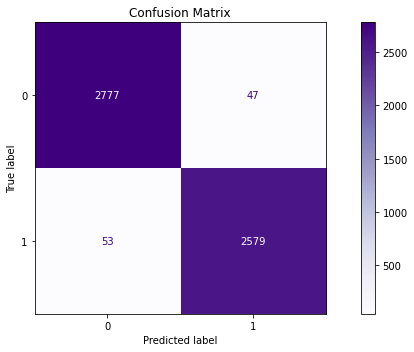

****MODEL PARAMETERS****


,parameters
ccp_alpha,0.0
class_weight,None
criterion,entropy
max_depth,8
max_features,None
max_leaf_nodes,27
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2


In [35]:
evaluate_model(dec_tree_grid.best_estimator_, X_train, y_train, \
               X_test, y_test, params=True)

In [ ]:
kn = KNeighborsClassifier()

params = {'n_neighbors':[21],
        'algorithm':['kd_tree'],
        'weights':['distance', 'uniform'],
        'metric':['manhattan', 'euclidean']}

kn_grid = GridSearchCV(kn, params, verbose=1, cv=3)
kn_grid.fit(X_train, y_train)

In [ ]:
kn = KNeighborsClassifier()

params = {'n_neighbors':[8,13, 21, 34, 55],
        'algorithm':['kd_tree', 'brute'],
        'weights':['distance', 'uniform'],
        'metric':['manhattan', 'euclidean', 'chebyshev']}

kn_grid = GridSearchCV(kn, params, verbose=1, cv=3)
kn_grid.fit(X_train, y_train)

In [37]:
kn_grid.best_params_, kn_grid.best_score_

({'algorithm': 'kd_tree',
  'metric': 'manhattan',
  'n_neighbors': 21,
  'weights': 'distance'},
 0.9833435803093457)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      6587
           1     1.0000    1.0000    1.0000      6141

    accuracy                         1.0000     12728
   macro avg     1.0000    1.0000    1.0000     12728
weighted avg     1.0000    1.0000    1.0000     12728

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.9813    0.9823    0.9818      2824
           1     0.9810    0.9799    0.9804      2632

    accuracy                         0.9811      5456
   macro avg     0.9811    0.9811    0.9811      5456
weighted avg     0.9811    0.9811    0.9811      5456

****CONFUSION MATRIX****


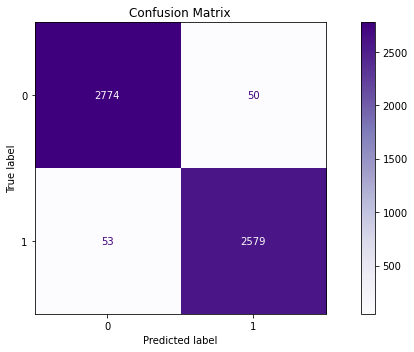

****MODEL PARAMETERS****


,parameters
algorithm,kd_tree
leaf_size,30
metric,manhattan
metric_params,None
n_jobs,None
n_neighbors,21
p,2
weights,distance


In [38]:
evaluate_model(kn_grid.best_estimator_, X_train, y_train, \
               X_test, y_test, params=True)

In [ ]:
params = {'gamma':['auto'],
        'kernel':['linear'],
        "C": [100]}

svc = SVC()

svc_grid = GridSearchCV(svc, params, verbose=1, cv=3)
svc_grid.fit(X_train, y_train)

In [ ]:
params = {'gamma':['auto', 1, 10, 100, 1e-2],
        'kernel':['linear','poly', 'rbf', 'sigmoid'],
        "C": [1, 10, 100, 1000]}

svc = SVC()

svc_grid = GridSearchCV(svc, params, verbose=1, cv=3)
svc_grid.fit(X_train, y_train)

In [40]:
svc_grid.best_params_, svc_grid.best_score_

({'C': 100, 'gamma': 'auto', 'kernel': 'linear'}, 0.9908860806285334)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.9933    0.9944    0.9939      6587
           1     0.9940    0.9928    0.9934      6141

    accuracy                         0.9936     12728
   macro avg     0.9936    0.9936    0.9936     12728
weighted avg     0.9936    0.9936    0.9936     12728

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.9915    0.9915    0.9915      2824
           1     0.9909    0.9909    0.9909      2632

    accuracy                         0.9912      5456
   macro avg     0.9912    0.9912    0.9912      5456
weighted avg     0.9912    0.9912    0.9912      5456

****CONFUSION MATRIX****


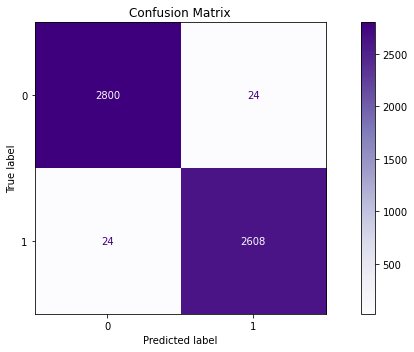

****MODEL PARAMETERS****


,parameters
C,100
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,auto
kernel,linear
max_iter,-1


In [41]:
evaluate_model(svc_grid.best_estimator_, X_train, y_train, \
               X_test, y_test, params=True)